In [1]:
# Importing the basic packages
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
# Importing the data and inspecting the shape of the features and label
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X, y = dataset['data'], dataset['target']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


1. A useful way to quickly visualize a dataset is to use principal component analysis, which finds the axes of maximum variance in the data. Using sklearn PCA with two components, fit the PCA model to the data and project it onto the two components (PCA(n_components=2).fit_transform(...)), then plot this transformed data using a 2D scatterplot (plt.plot(...)). Note that this visualization doesn’t take the target into account (it is unsupervised).

In [77]:
###### Exercise 1: Using PCA to aid visualization #####

# Scaling the  data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

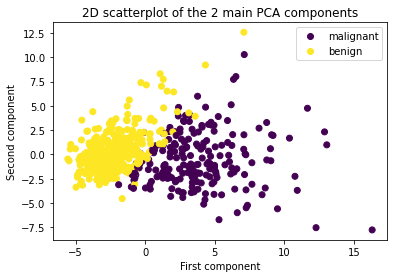

In [78]:
# Fitting and plotting the pca model
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(dataset['target_names']))
plt.gca().set(
    title="2D scatterplot of the 2 main PCA components",
    xlabel="First component",
    ylabel="Second component",
)
plt.show()

The scatterplot of the two PCA components reveals a distinct boundary between the two categories of interest ("malignant" vs "benign"). We can be confident that we will be able to accurately classify the target variable (also known as label). 

2. When training a machine learning model we are often concerned with features that are highly correlated with each other, as they carry redundant information. Calculate the pearson correlation (np.corrcoef(..., rowvar=False)will calculate the symmetric correlation matrix, or scipy.pearsonr(...) also works) between each pair of features/columns, and plot a histogram with 50 bins of the pearson correlations (plt.hist(..., bins=50)). Hints: np.tril(...,k=1) will help remove the redundant correlation values and np.flatten(...) will convert a 2d array into a 1d array.

(30, 30)
(900,)


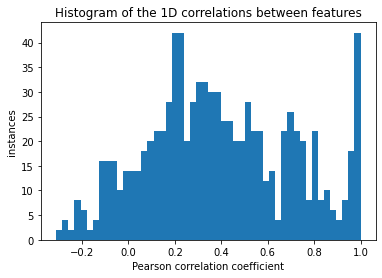

In [79]:
###### Exercise 2: Computing the Pearson correlation between features #####

corr = np.corrcoef(X, rowvar=False)
corr_flat = np.ndarray.flatten(corr)
print(corr.data.shape) 
print(corr_flat.data.shape)

plt.hist (corr_flat, bins=50)
plt.gca().set(
    title="Histogram of the 1D correlations between features",
    xlabel="Pearson correlation coefficient",
    ylabel="instances",
)
plt.show()

It looks like we have a lot of correlations with a value close and equal to 1. This is not good because it means that some of our features are highly correlated, thus creating redundancy. We can use "np.tril" to prune these correlations, aiding us in our feature selection:

(30, 30)
(900,)


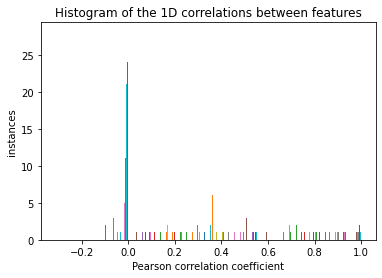

In [80]:
# Removing the redundant correlations 
corr_tril = np.tril(corr,k=1) 
corr_flat = np.ndarray.flatten(corr_tril)
print(corr_tril.data.shape) 
print(corr_flat.data.shape)

plt.hist (corr_tril, bins=50)
plt.gca().set(
    title="Histogram of the 1D correlations between features",
    xlabel="Pearson correlation coefficient",
    ylabel="instances",
)
plt.show()

The number of correlations close and equal to 1 has greatly diminished, leaving us with a clear majority of variables with a Pearson correlation value of 0 with respect to each other. This is good, because it means that now most of features are independent from each other.

3. Plot a scatterplot (plt.plot(...)) of “mean concavity” vs "worst area”, with points coloured by class label (target). Include a legend to indicate which color indicates which label. Hint: overlay two scatterplots, one for each set of points.

In [149]:
###### Exercise 3: Scatterplot of "mean concavity BY worst error" #####

# Let's take a look at the feature names to find the indices of the two variables we need

list(dataset.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

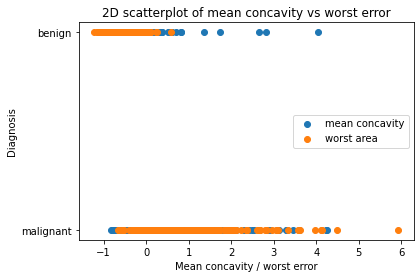

In [143]:
# Now we can plot the data using the indices

plt.scatter(X[:,6], y[:])
plt.scatter(X[:,23], y[:])
plt.legend(labels=(dataset.feature_names[6],dataset.feature_names[23]))
plt.gca().set(
    title="2D scatterplot of mean concavity vs worst error",
    xlabel="Mean concavity / worst error",
    ylabel="Diagnosis",
    yticks = [0,1],
    yticklabels = list(dataset['target_names'])
)
plt.show()

The "worst area" variable displays a neater distinction between labels than the "mean concavity" variable, whereby lower values of "worst area" are more clearly associated with a benign diagnosis, and vice versa for higher values. We will want to keep an eye on "worst area" as a potential key variable.

4. Create a violinplot (plt.violinplot(..., showextrema=False)) of the features with highest mean, highest median, highest variance (plot should have three vertical distributions). First calculate the mean (np.mean(...)), median (np.median(...)), and variance (np.std(...)), then create the violinplot of these three arrays.

In [9]:
###### Exercise 4: Creating a violinplot of salient features" #####

# First we need to re-import the raw (non-standardized) dataset

from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
dataset = load_breast_cancer()
X, y = dataset['data'], dataset['target']

# We normalize the data

X = preprocessing.normalize(X)

# We create the three arrays of interest (mean, median and std)

feature_means = np.mean(X, axis = 0)
feature_medians = np.median(X, axis = 0)
feature_std = np.std(X, axis = 0)

# And we extract the indices of the maximum values for each

print(np.argmax(feature_means))
print(np.argmax(feature_medians))
print(np.argmax(feature_std))


23
23
3


In [10]:
# Print the feature names based on the indices we just got

print ((dataset['feature_names'])[23])
print ((dataset['feature_names'])[3])

worst area
mean area


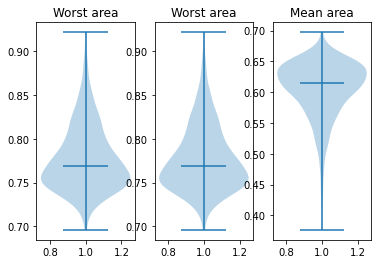

In [11]:
# Now we can plot the three features side-by-side

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# Plot violin plot on axis 1
ax1.violinplot(X[:,23], showmedians=True)
ax1.set_title('Worst area')

# Plot violin plot on axis 2
ax2.violinplot(X[:,23], showmedians=True)
ax2.set_title('Worst area')

# Plot violin plot on axis 3
ax3.violinplot(X[:,3], showmedians=True)
ax3.set_title('Mean area')

plt.show()

Looks like "worst area" is the feature with the highest (normalized) mean and the highest (normalized) median. Both values lie close to each other between the 0.75 and 0.8 normalized range. Conversely, the feature with the widest spread (biggest variance) is "mean area" with a range of 0.4 to 0.7, likely indicating the presence of outliers close to the bottom of the range (see "Mean area" in plot above). 

5. Divide the data into a training and test set using train_test_split(data, targets, test_size=0.2, shuffle=False). Train a logistic regression classifier (LogisticRegression(..., max_iter=1e4), default parameters) on the training split and score on the test split. What is the out-of-sample classification accuracy (ie accuracy on the unseen test data)? How many iterations did it take for the model to converge (check the .n_iter_ attribute of the trained model).

In [12]:
###### Exercise 5: Dividing the data into train and test set + Logistic regression" #####

# First we will import the raw data again

from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X, y = dataset['data'], dataset['target']

# We split the data based on the instructions

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [137]:
# We run the logistic regression algorithm on the test data

from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1e4).fit(X_train, y_train)

yhat = LR.predict(X_test)

# Now we measure the model's accuracy using score
score = LR.score(X_test, y_test)
print('Accuracy: %.3f (%.3f)' % ((score), std(score)))

Accuracy: 0.930 (0.000)


That's a pretty high accuracy score! Let's check the number of iterations that the model used to converge

In [14]:
print(LR.n_iter_)

[27]


Looks like it took 27 iterations to converge to an optimal solution. We should be able to reduce this number by tweaking the model.

6. Create a pipeline model (make_pipeline(...)) that combines StandardScaler() followed by the same logistic regression model as in 5, and train/test this pipeline model on the same data splits as in 5. What is the out-of-sample classification accuracy now that the data is being standardized? How many iterations did it take for the model to converge (to access the attributes of the logistic regression model now that it’s part of a pipeline, use [your pipeline model].logisticregression)? Notice the effect that scaling the data has.

In [166]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(max_iter=1e4))])
model = pipe.fit(X_train, y_train)

yhat = model.predict(X_test)

# Now we measure the model's accuracy using score
score = pipe.score(X_test, y_test)
print('Accuracy: %.3f (%.3f)' % ((score), std(score)))

Accuracy: 0.982 (0.000)


Looks like the prediction accuracy has improved from 0.93 to 0.98 after we scaled the data. Let's check the number of iterations again:

?? I was unable to compute the number of iterations to convergence ?? 

7. Divide the data into training and test sets using KFold(n_splits=5, shuffle=False), and train the pipeline model from 6 on each training split (you will re-train the model 5 times, once for each split). Create a scatterplot of the test accuracies for each split (x-axis is the data splits, y-axis is accuracy).

In [139]:
from sklearn import cross_validation
from sklearn.model_selection import KFold

cv = KFold(5)

pipe = Pipeline([('scaler', StandardScaler()), ('logr', LogisticRegression(max_iter=1e4))])
model = pipe.fit(X_train, y_train)

yhat = model.predict(X_test)

scores = cross_validation.cross_val_score(model, X_train, y_train, cv=5)
print(scores)
print('Total accuracy: %.3f (%.3f)' % (mean(score), std(score)))

[0.98913043 0.98901099 0.94505495 0.96703297 0.98888889]
Total accuracy: 0.930 (0.000)


Kfold cross-validation gave us a very good total prediction accuracy of 0.982, just like in the previous train_test pipeline with a Scaler. Let's take a look at a scatterplot of the respective accuracies of the 5 folds:

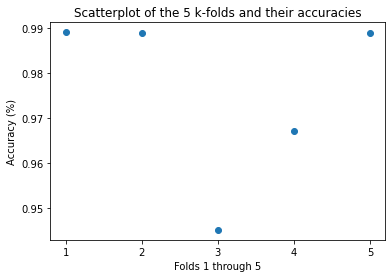

In [142]:
plt.scatter(x_axis,scores)
plt.gca().set(
    title="Scatterplot of the 5 k-folds and their accuracies",
    xticks = [1,2,3,4,5],
    xlabel="Folds 1 through 5",
    ylabel="Accuracy (%)",
)
plt.show()

8. Use LeaveOneOut() and the same pipeline model as in 6. Create a scatterplot of the test accuracies for each split (the number of splits is now equal to the number of samples (rows).

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import around

cv = LeaveOneOut()

pipe = Pipeline([('scaler', StandardScaler()), ('logr', LogisticRegression(max_iter=1e4))])
model = pipe.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=cv)
scores = np.around(scores, 7)
print(scores)
print('Total accuracy: %.3f (%.3f)' % (mean(score), std(score)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

Once again, we get a very good total prediction accuracy of 0.982, this time using a LOOCV procedure instead of K-fold. The fact that all these cross-validation procedures produce such similar prediction accuracies is a good sign.

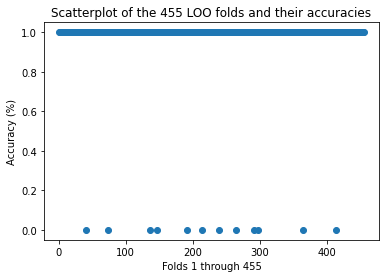

In [156]:
x_axis = list(range(1,455+1))
plt.scatter(x_axis,scores)
plt.gca().set(
    title="Scatterplot of the 455 LOO folds and their accuracies",
    xlabel="Folds 1 through 455",
    ylabel="Accuracy (%)",
)
plt.show()